# TP Clustering

In [173]:
from sklearn import cluster
from scipy.io import arff
from sklearn import metrics
from sklearn.datasets import make_blobs
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
import time
import random
import sys

f_silhouette = lambda X,labels : [None, 0] if X == None and labels == None else [metrics.silhouette_score(X, labels, metric="euclidean"),0] 
f_calHar = lambda X,labels : [None, 0] if X == None and labels == None else [metrics.calinski_harabasz_score(X, labels),0]
f_davBou = lambda X,labels : [None, 1] if X == None and labels == None else [metrics.davies_bouldin_score(X, labels), 1]

## 1 Jeux de données
Les jeux de données sont disponibles sur le site : https://github.com/deric/clustering-benchmark.
Seuls les jeux de données "artificiels" seront considérés dans ces TP.

In [5]:
fileTestName = "2d-10c.arff"

#colors = ['r','b','y','g', 'lime', 'bisque', 'lightcoral', 'mediumturquoise', 'sandybrown', 'black']
#colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(100)]

nbClusters = 9

def load_file(filepath):
    return arff.loadarff(open(filepath, 'r'))

data = load_file("./artificial/"+fileTestName)[0]

In [6]:
new_data = []
x_list = []
y_list = []
z_list = []
for (x,y,_) in data : 
    new_data.append([x,y])
    x_list.append(x)
    y_list.append(y)

In [7]:
kmeans = cluster.KMeans(n_clusters=nbClusters, init='k-means++').fit(new_data)
labels = kmeans.labels_

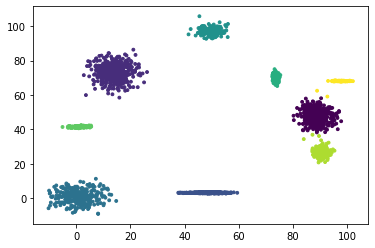

In [8]:
#for (x,y,_) in zip(x_list, y_list, kmeans.labels_):
    #plt.plot(x, y,'o',color=colors[c])    
#plt.plot(x_list, y_list,'o',color=colors[indexColor])

plt.scatter(x_list, y_list, c=labels,s=8)
plt.show()

Identifiez pour cela dans la documentation de scikitlearn 1 les métriques qui vous semblent
pertinentes.https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [9]:
i_max = -1
score_max = 0
starttime = time.time()

for i in range(2,10) :
    data_temp = new_data;
    kmeans = cluster.KMeans(n_clusters=i, init='k-means++').fit(data_temp)
    labels = kmeans.labels_
    score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
    if score > score_max :
        i_max = i
        score_max = score

endtime = time.time()
print("Best cluster number : ",i_max," Best score : ",score_max)
print("Runtime : ", round((endtime - starttime)*1000,2),"ms")

Best cluster number :  9  Best score :  0.8377446510558256
Runtime :  954.24 ms


# 2 Clustering k-Means

In [178]:
def kMeansCluster(fileTestName,n_clusters):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    for (x,y,_) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    starttime = time.time()

    
    data_temp = new_data;
    kmeans = cluster.KMeans(n_clusters, init='k-means++',random_state=3).fit(data_temp)
    labels = kmeans.labels_
    score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
    
    endtime = time.time()
    
    plt.scatter(x_list, y_list, c=labels,s=10,cmap="rainbow")
    plt.show()
    print("Best cluster number : ",n_clusters, " Best score : ",score)
    print("Runtime : ", round((endtime - starttime)*1000,2),"ms")
    
def kMeans(fileTestName, metric):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    for (x,y,_) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    [_, cmp] = metric(None, None)
    score_max = cmp*sys.maxsize
    best_kmeans = None
    starttime = time.time()

    for i in range(2,50) :
        data_temp = new_data;
        kmeans = cluster.KMeans(n_clusters=i, init='k-means++',random_state=3).fit(data_temp)
        kmeans_labels = kmeans.labels_
        [score, cmp] = metric(data_temp, kmeans_labels)

        if (score > score_max and cmp == 0) or (score < score_max and cmp == 1):
            score_max = score
            best_kmeans=kmeans_labels
    endtime = time.time()

        

    plt.scatter(x_list, y_list, c=best_kmeans,s=10,cmap="rainbow")
    plt.show()
    
    print("Best cluster number : ",best_kmeans.max()+1, " Best score : ",score_max)
    print("Runtime : ", round((endtime - starttime)*1000,2),"ms")
    


### 2.1 Intérêts de la méthode

Appliquez la méthodek-Means en lui donnant directement le nombre de clusters attendus (uti-lisez l’initialisationk-means++)

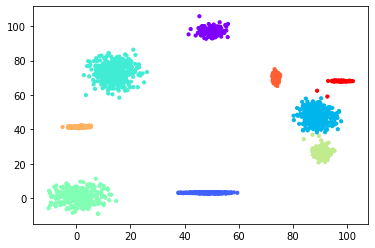

Best cluster number :  9  Best score :  0.8377446510558256
Runtime :  124.99 ms


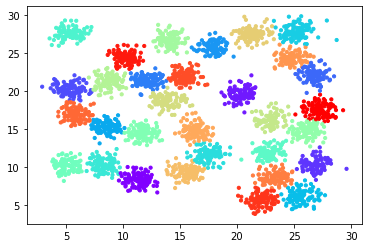

Best cluster number :  31  Best score :  0.5755674273166536
Runtime :  202.74 ms


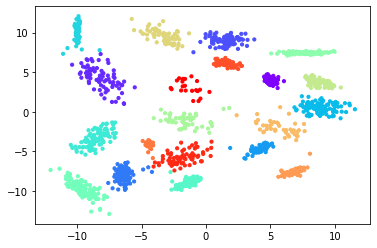

Best cluster number :  20  Best score :  0.6616821653207235
Runtime :  99.31 ms


In [148]:
kMeansCluster("2d-10c.arff",9)
kMeansCluster("D31.arff",31)
kMeansCluster("2d-20c-no0.arff",20)

Appliquez itérativement la méthode précédente pour déterminer le bon nombre de clusters àl’aide de métriques d’évaluation sélectionnées

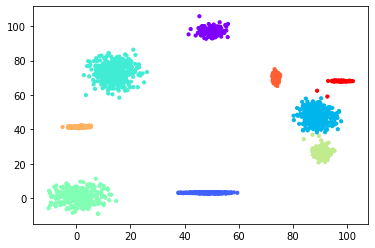

Best cluster number :  9  Best score :  0.8377446510558256
Runtime :  9214.97 ms


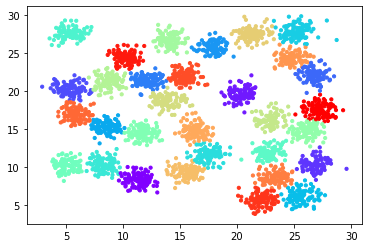

Best cluster number :  31  Best score :  0.5755674273166536
Runtime :  10509.7 ms


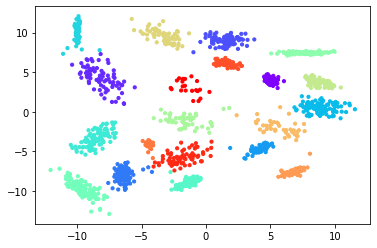

Best cluster number :  20  Best score :  0.6616821653207235
Runtime :  5141.84 ms


In [157]:
#silhouette_score
kMeans("2d-10c.arff",f_silhouette)
kMeans("D31.arff",f_silhouette)
kMeans("2d-20c-no0.arff",f_silhouette)

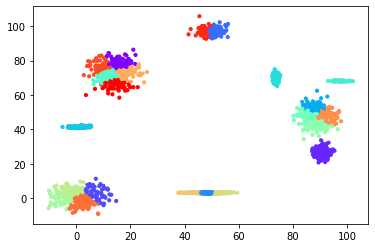

Best cluster number :  22  Best score :  52541.76903460113
Runtime :  5128.07 ms


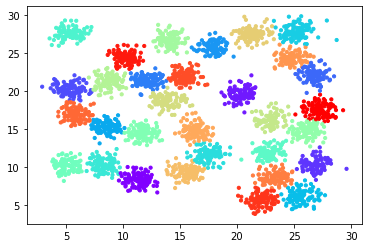

Best cluster number :  31  Best score :  9167.98090794413
Runtime :  5473.04 ms


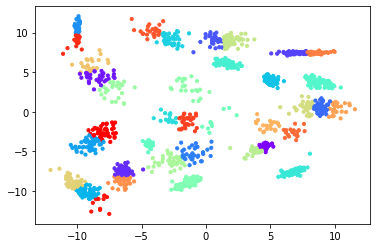

Best cluster number :  37  Best score :  7020.290573219402
Runtime :  4269.02 ms


In [181]:
#Calinski-Harabasz Index
kMeans("2d-10c.arff",f_calHar)
kMeans("D31.arff",f_calHar)
kMeans("2d-20c-no0.arff",f_calHar)

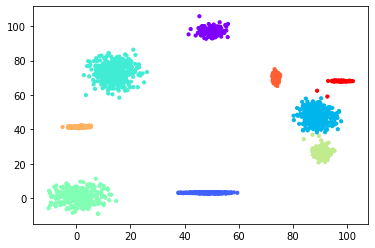

Best cluster number :  9  Best score :  0.22821719896766357
Runtime :  5183.4 ms


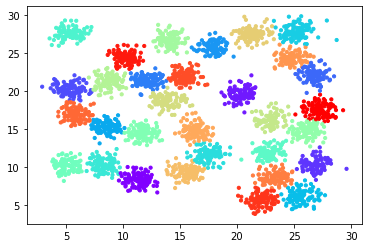

Best cluster number :  31  Best score :  0.5471933004835284
Runtime :  5664.45 ms


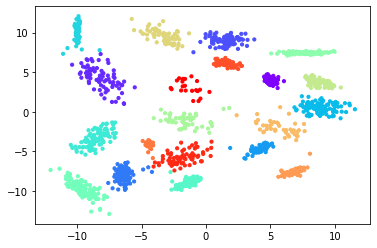

Best cluster number :  20  Best score :  0.4734515211021004
Runtime :  4178.55 ms


In [179]:
#Davies-Bouldin Index
kMeans("2d-10c.arff",f_davBou)
kMeans("D31.arff",f_davBou)
kMeans("2d-20c-no0.arff",f_davBou)

### 2.2 Limites de la méthode

Best cluster number :  31  Best score :  0.5755719472730905
Runtime :  9546.83 ms


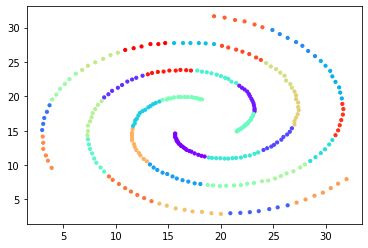

Best cluster number :  34  Best score :  0.4789562014376695
Runtime :  3285.8 ms


In [15]:
kMeans("3-spiral.arff")

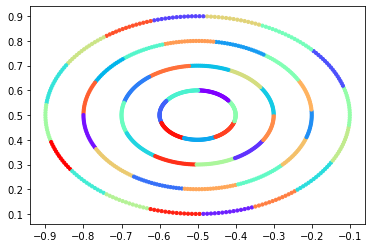

Best cluster number :  49  Best score :  0.48029537750726775
Runtime :  4611.2 ms


In [71]:
kMeans("dartboard1.arff")

La méthode ne permet pas d'identifier des clusters non convexes.  
Cela est inhérent à la manière dont elle fonctionne.  
Une autre métrique d'évaluation ne permettrait pas d'identifier correctement les clusters dans les 2 cas précédents.

### 2.3 Evalution

In [182]:
def kMeansTime(fileTestName,begin,end):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    run_time=[]
    for (x,y,_) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    i_max = 0
    score_max = 0
    starttime = time.time()
    
    for i in range(begin,end) :
        data_temp = new_data;
        kmeans = cluster.KMeans(n_clusters=i, init='k-means++',random_state=3).fit(data_temp)
        labels = kmeans.labels_
        score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
        if score > score_max :
            i_max = i
            score_max = score
        endtime = time.time()
        run_time.append(round((endtime - starttime)*1000,2))
    
    plt.plot(range(begin,end), run_time, 'b^-',label='trendence')
    plt.legend()
    #plt.set_title('relation between runtime and cluster number')
    #plt.set_xlabel('number of cluster')
    #plt.set_ylabel('run time \(ms\)')
    plt.show()
    print("Best cluster number : ",i_max, " Best score : ",score_max)
    

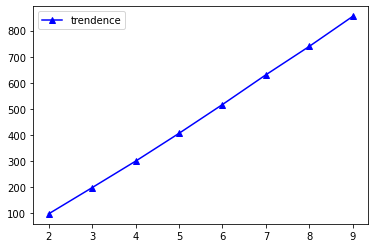

Best cluster number :  9  Best score :  0.8377446510558256


In [183]:
kMeansTime("2d-10c.arff",2,10)

# 3 Clustering agglomératif

In [195]:
def AgglomeratifCluster(fileTestName,manieres,n_clusters):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    for (x,y,_) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
        
    starttime = time.time()

    data_temp = new_data;
    kmeans = cluster.AgglomerativeClustering(n_clusters,linkage=manieres, affinity='euclidean').fit(data_temp)
    labels = kmeans.labels_
    score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
    endtime = time.time()
    
    plt.scatter(x_list, y_list, c=labels,s=8,cmap="rainbow")
    plt.show()
    print("best cluster number : ",n_clusters, " best score : ",score)
    print("time execution : ", round((endtime - starttime)*1000,2),"ms")
    
def Agglomeratif(fileTestName,manieres,metric):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    for (x,y,_) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    [_, cmp] = metric(None, None)
    score_max = cmp*sys.maxsize
    best_kmeans = None
    starttime = time.time()

    for i in range(2,50) :
        data_temp = new_data;
        kmeans = cluster.AgglomerativeClustering(n_clusters=i,linkage=manieres, affinity='euclidean').fit(data_temp)
        kmeans_labels = kmeans.labels_
        [score, cmp] = metric(data_temp, kmeans_labels)
        
        if (score > score_max and cmp == 0) or (score < score_max and cmp == 1):
            score_max = score
            best_kmeans=kmeans_labels
    endtime = time.time()
    kmeans = cluster.AgglomerativeClustering(n_clusters=i_max,linkage=manieres, affinity='euclidean').fit(data_temp)
    labels = kmeans.labels_
    
    plt.scatter(x_list, y_list, c=best_kmeans,s=8,cmap="rainbow")
    plt.show()
    print("Best cluster number : ",best_kmeans.max()+1, " Best score : ",score_max)
    print("time execution : ", round((endtime - starttime)*1000,2),"ms")


### 3.1 Intérêts de la méthode

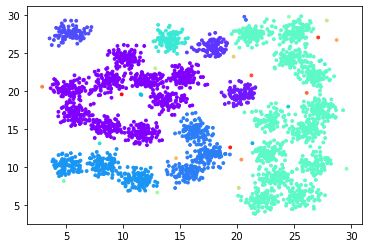

best cluster number :  31  best score :  -0.3896440188293575
time execution :  120.13 ms


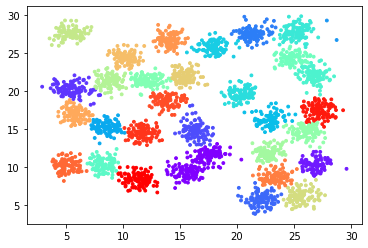

best cluster number :  31  best score :  0.5622700040906442
time execution :  200.56 ms


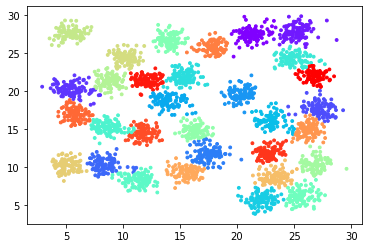

best cluster number :  31  best score :  0.5636664592980722
time execution :  199.16 ms


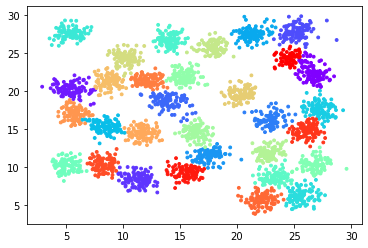

best cluster number :  31  best score :  0.5640591525907602
time execution :  213.68 ms


In [192]:
AgglomeratifCluster("D31.arff",'single',31)
AgglomeratifCluster("D31.arff",'average',31)
AgglomeratifCluster("D31.arff",'complete',31)
AgglomeratifCluster("D31.arff",'ward',31)

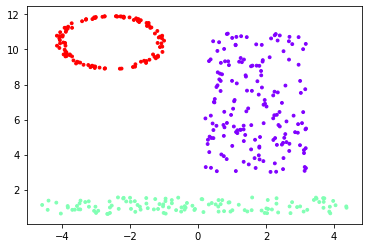

best cluster number :  3  best score :  0.4956142510948985
time execution :  8.93 ms


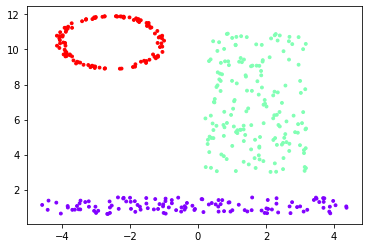

best cluster number :  3  best score :  0.4956142510948985
time execution :  4.51 ms


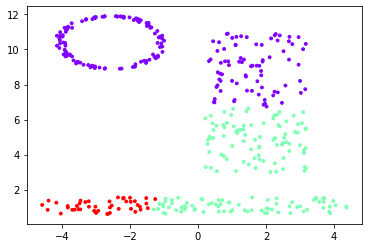

best cluster number :  3  best score :  0.45738534560833777
time execution :  5.32 ms


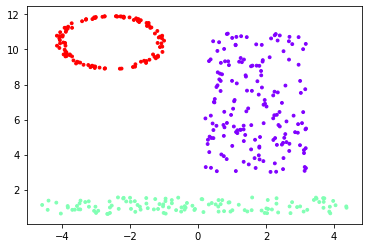

best cluster number :  3  best score :  0.4956142510948985
time execution :  5.03 ms


In [193]:
AgglomeratifCluster("3MC.arff",'single',3)
AgglomeratifCluster("3MC.arff",'average',3)
AgglomeratifCluster("3MC.arff",'complete',3)
AgglomeratifCluster("3MC.arff",'ward',3)

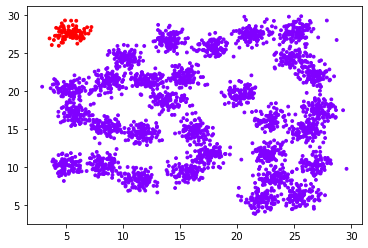

Best cluster number :  2  Best score :  0.23044322898606115
time execution :  5898.26 ms


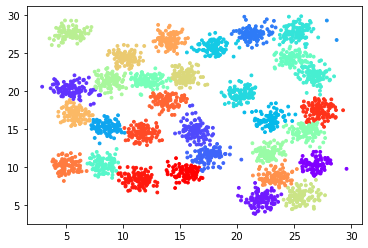

Best cluster number :  32  Best score :  0.5666400765005847
time execution :  10427.23 ms


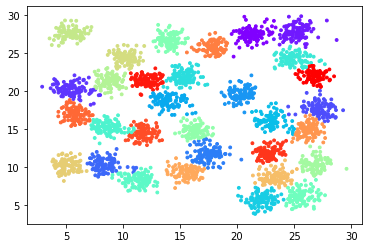

Best cluster number :  31  Best score :  0.5636664592980722
time execution :  10190.78 ms


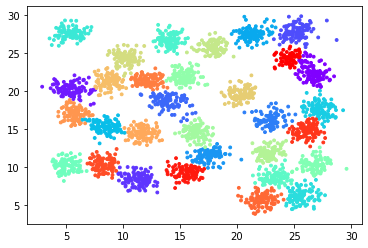

Best cluster number :  31  Best score :  0.5640591525907602
time execution :  10318.6 ms


In [196]:
Agglomeratif("D31.arff",'single',f_silhouette)
Agglomeratif("D31.arff",'average',f_silhouette)
Agglomeratif("D31.arff",'complete',f_silhouette)
Agglomeratif("D31.arff",'ward',f_silhouette)

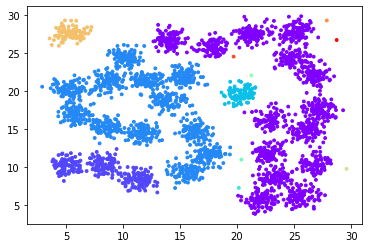

Best cluster number :  12  Best score :  288.26138425390917
time execution :  1716.17 ms


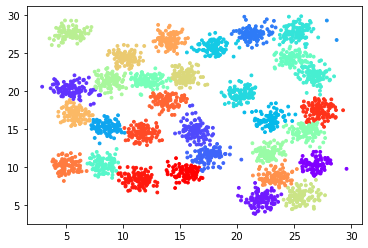

Best cluster number :  32  Best score :  8683.26193359154
time execution :  5646.35 ms


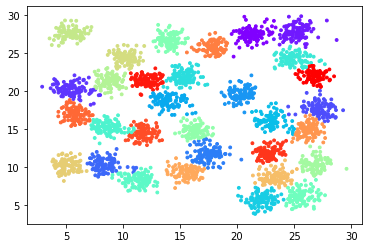

Best cluster number :  31  Best score :  8763.753449812082
time execution :  5541.83 ms


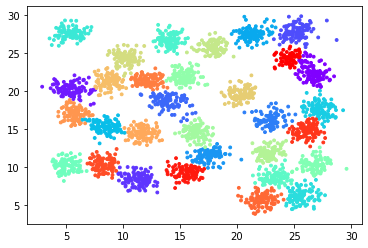

Best cluster number :  31  Best score :  8778.524791454909
time execution :  6344.57 ms


In [197]:
Agglomeratif("D31.arff",'single',f_calHar)
Agglomeratif("D31.arff",'average',f_calHar)
Agglomeratif("D31.arff",'complete',f_calHar)
Agglomeratif("D31.arff",'ward',f_calHar)

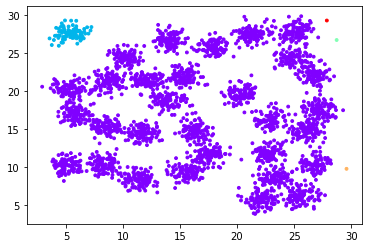

Best cluster number :  5  Best score :  0.6147049191068784
time execution :  1850.89 ms


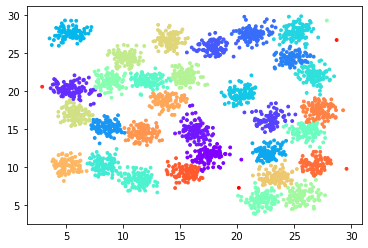

Best cluster number :  36  Best score :  0.5241419099213152
time execution :  5802.26 ms


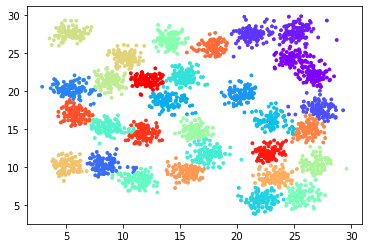

Best cluster number :  30  Best score :  0.5588565838365422
time execution :  6058.46 ms


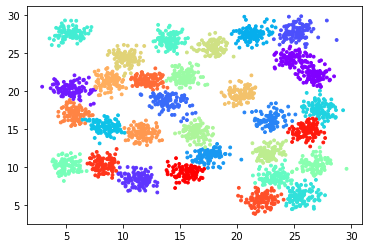

Best cluster number :  30  Best score :  0.5539703648101987
time execution :  6284.07 ms


In [198]:
Agglomeratif("D31.arff",'single',f_davBou)
Agglomeratif("D31.arff",'average',f_davBou)
Agglomeratif("D31.arff",'complete',f_davBou)
Agglomeratif("D31.arff",'ward',f_davBou)

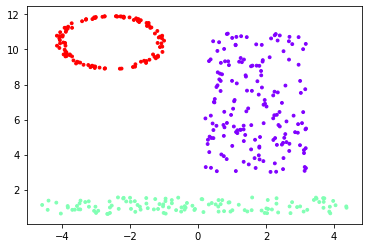

Best cluster number :  3  Best score :  0.4956142510948985
time execution :  196.66 ms


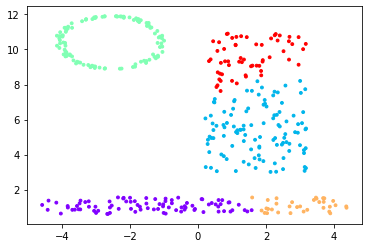

Best cluster number :  5  Best score :  0.5019966425875431
time execution :  206.7 ms


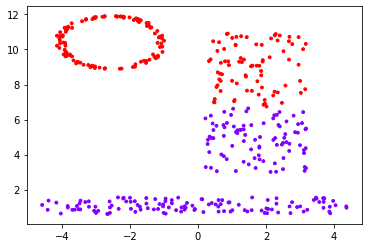

Best cluster number :  2  Best score :  0.5319623563925211
time execution :  233.38 ms


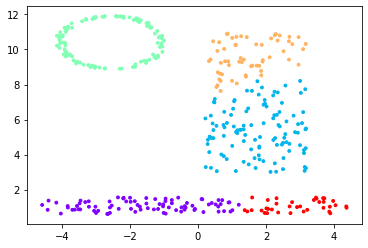

Best cluster number :  5  Best score :  0.5063895038472094
time execution :  249.48 ms


In [199]:
Agglomeratif("3MC.arff",'single',f_silhouette)
Agglomeratif("3MC.arff",'average',f_silhouette)
Agglomeratif("3MC.arff",'complete',f_silhouette)
Agglomeratif("3MC.arff",'ward',f_silhouette)

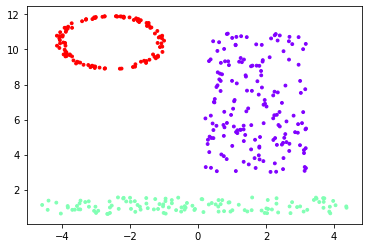

Best cluster number :  3  Best score :  628.0489014193492
time execution :  112.99 ms


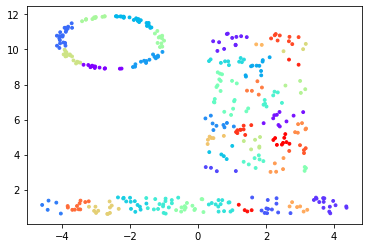

Best cluster number :  44  Best score :  1506.4397525965242
time execution :  161.43 ms


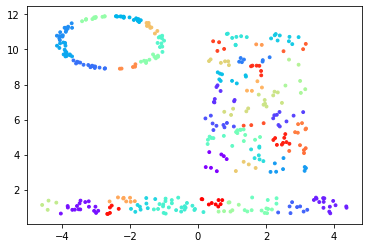

Best cluster number :  49  Best score :  1557.2805787828577
time execution :  157.66 ms


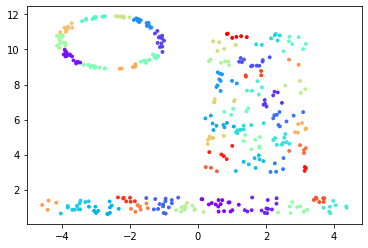

Best cluster number :  49  Best score :  1723.0165360627886
time execution :  170.52 ms


In [200]:
Agglomeratif("3MC.arff",'single',f_calHar)
Agglomeratif("3MC.arff",'average',f_calHar)
Agglomeratif("3MC.arff",'complete',f_calHar)
Agglomeratif("3MC.arff",'ward',f_calHar)

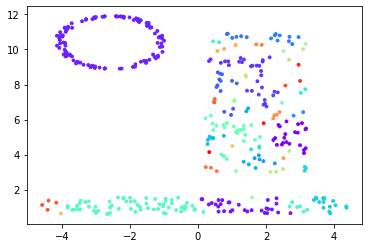

Best cluster number :  48  Best score :  0.5843535758982878
time execution :  270.67 ms


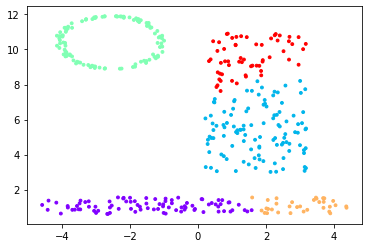

Best cluster number :  5  Best score :  0.5830870921521715
time execution :  307.0 ms


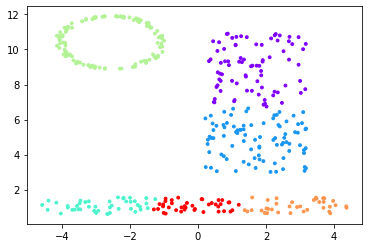

Best cluster number :  6  Best score :  0.6027438479849588
time execution :  307.48 ms


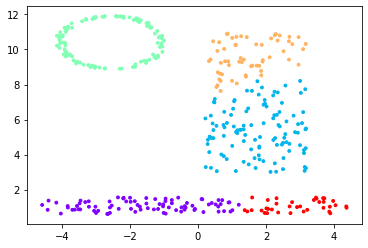

Best cluster number :  5  Best score :  0.5832075693321912
time execution :  315.2 ms


In [201]:
Agglomeratif("3MC.arff",'single',f_davBou)
Agglomeratif("3MC.arff",'average',f_davBou)
Agglomeratif("3MC.arff",'complete',f_davBou)
Agglomeratif("3MC.arff",'ward',f_davBou)

### 3.2 Limites de la méthode

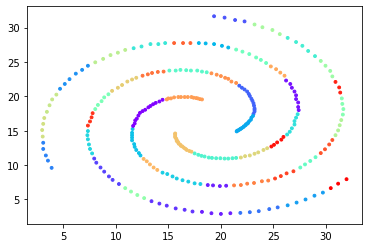

Best cluster number :  48  Best score :  0.4467478405947203
time execution :  160.16 ms


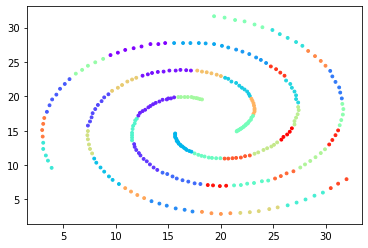

Best cluster number :  45  Best score :  0.45282010195284783
time execution :  156.37 ms


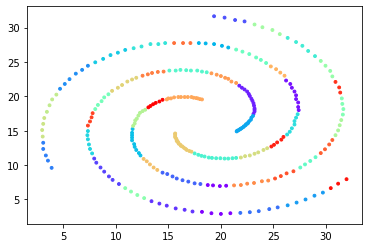

Best cluster number :  49  Best score :  423.8460657265097
time execution :  107.49 ms


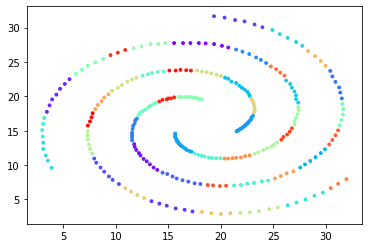

Best cluster number :  49  Best score :  455.7222996473953
time execution :  118.38 ms


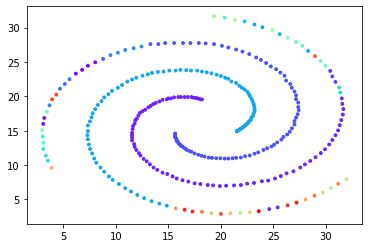

Best cluster number :  49  Best score :  0.8293094100461474
time execution :  243.85 ms


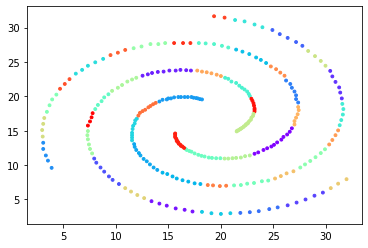

Best cluster number :  49  Best score :  0.5225178210744961
time execution :  275.6 ms


In [203]:
Agglomeratif("3-spiral.arff",'complete',f_silhouette)
Agglomeratif("3-spiral.arff",'ward',f_silhouette)
Agglomeratif("3-spiral.arff",'complete',f_calHar)
Agglomeratif("3-spiral.arff",'ward',f_calHar)
Agglomeratif("3-spiral.arff",'single',f_davBou)
Agglomeratif("3-spiral.arff",'average',f_davBou)

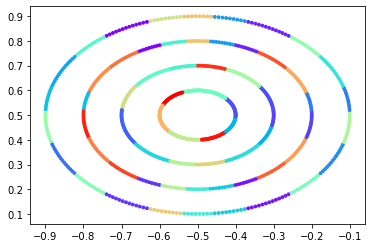

Best cluster number :  49  Best score :  0.3695384804205307
time execution :  1029.87 ms


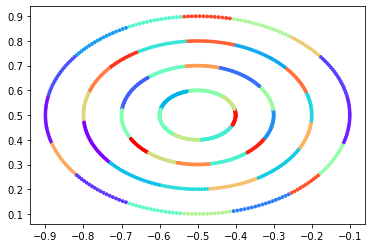

Best cluster number :  49  Best score :  0.45672259806953813
time execution :  1193.0 ms


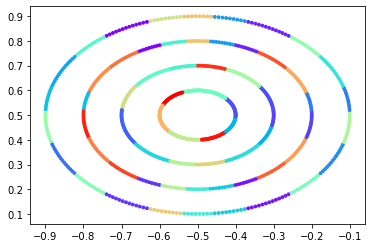

Best cluster number :  49  Best score :  815.7900935463683
time execution :  593.09 ms


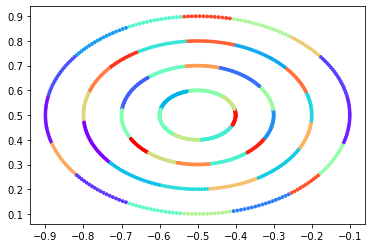

Best cluster number :  49  Best score :  1038.560950894871
time execution :  681.94 ms


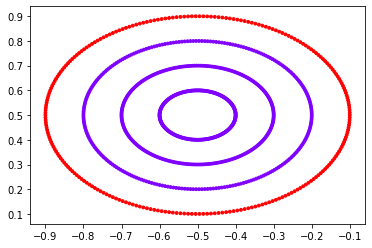

Best cluster number :  2  Best score :  0.0
time execution :  420.75 ms


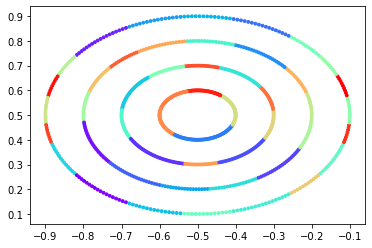

Best cluster number :  49  Best score :  0.6337524725695525
time execution :  708.57 ms


In [204]:
Agglomeratif("dartboard1.arff",'complete',f_silhouette)
Agglomeratif("dartboard1.arff",'ward',f_silhouette)
Agglomeratif("dartboard1.arff",'complete',f_calHar)
Agglomeratif("dartboard1.arff",'ward',f_calHar)
Agglomeratif("dartboard1.arff",'single',f_davBou)
Agglomeratif("dartboard1.arff",'average',f_davBou)

La méthode ne permet pas d'identifier des clusters non convexes.  
En effet, elle consiste à séparer ou agglomérer des points et groupes de points en se basant sur la distance qui les sépare (notion de proximité).  
Une autre métrique d'évaluation ne permettrait pas d'identifier correctement les clusters dans les 2 cas précédents.

## 4 Clustering DBSCAN

In [207]:
def clusterDBSCAN(fileTestName,eps,min_samples):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    
    for (x,y,z) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    starttime = time.time()

    data_temp = new_data;
    kmeans = cluster.DBSCAN(eps = eps, min_samples = min_samples).fit(data_temp)
    kmeans_predict = cluster.DBSCAN(eps = eps, min_samples = min_samples).fit_predict(data_temp)
    labels = kmeans.labels_
    
    score = metrics.calinski_harabasz_score(data_temp, labels)
    endtime = time.time()
    
    plt.scatter(x_list, y_list, c=labels,s=8,cmap="rainbow")
    plt.show()
    print(" best score : ",score)
    print("time execution : ", round((endtime - starttime)*1000,2),"ms")
    

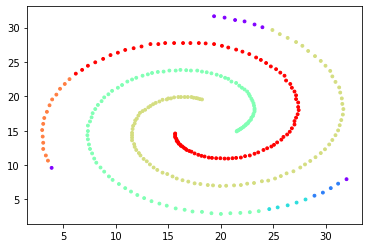

 best score :  15.389184611478369
time execution :  3.38 ms


In [209]:
clusterDBSCAN("3-spiral.arff",1,3)

## 5 Clustering HDBSCAN

In [55]:
def clusterHDBSCAN(fileTestName,min_cluster_size):
    data = load_file("./artificial/"+fileTestName)[0]
    new_data = []
    x_list = []
    y_list = []
    for (x,y,_) in data : 
        new_data.append([x,y])
        x_list.append(x)
        y_list.append(y)
    i_max = 0
    score_max = 0
    starttime = time.time()

    data_temp = new_data;
    for i in range(2,min_cluster_size):
        clusterer =  hdbscan.HDBSCAN(i)
        labels =  clusterer.fit_predict(data_temp)
       # score = metrics.silhouette_score(data_temp, labels, metric='euclidean')
        endtime = time.time()
        plt.scatter(x_list, y_list, c=labels,s=8,cmap="rainbow")
        plt.show()
    #print("best cluster number : ",i_max, " best score : ",score_max)
    
        print("number cluster",clusterer.labels_.max()+1,"time execution : ", round((endtime - starttime)*1000,2),"ms")


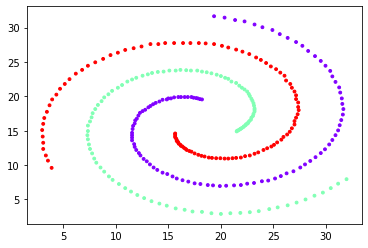

number cluster 3 time execution :  8.25 ms


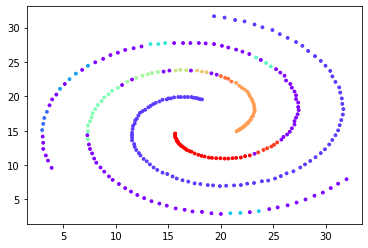

number cluster 14 time execution :  81.52 ms


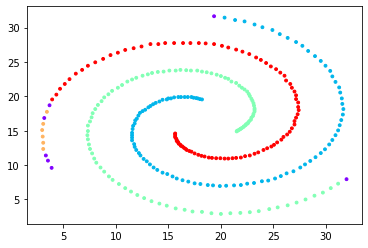

number cluster 4 time execution :  154.49 ms


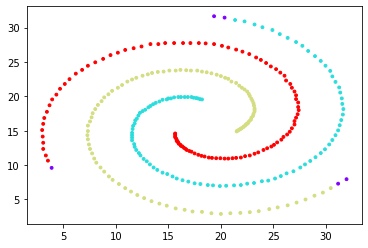

number cluster 3 time execution :  226.77 ms


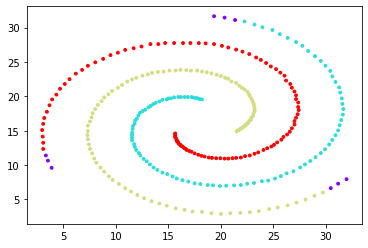

number cluster 3 time execution :  301.12 ms


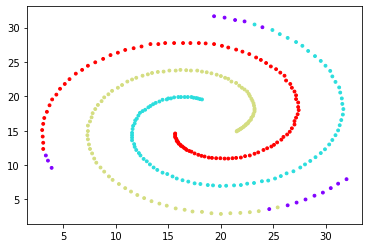

number cluster 3 time execution :  376.34 ms


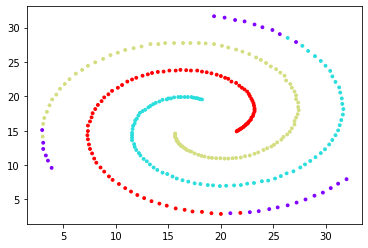

number cluster 3 time execution :  450.73 ms


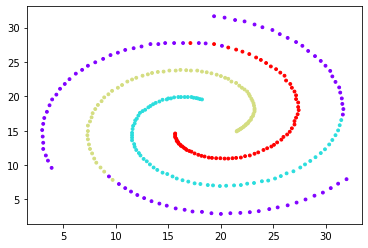

number cluster 3 time execution :  525.88 ms


In [56]:
clusterHDBSCAN("3-spiral.arff",10)

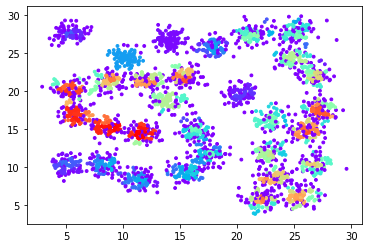

number cluster 414 time execution :  49.6 ms


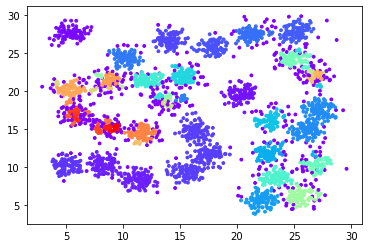

number cluster 75 time execution :  230.94 ms


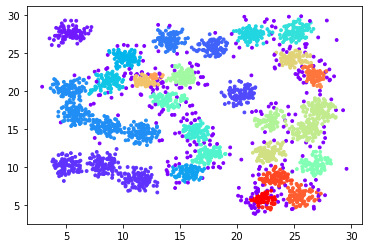

number cluster 32 time execution :  372.64 ms


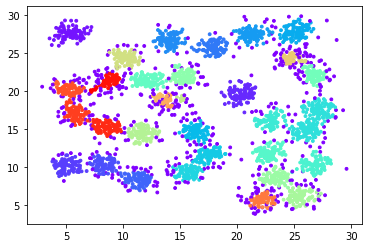

number cluster 38 time execution :  511.74 ms


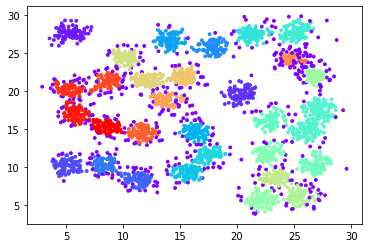

number cluster 32 time execution :  650.98 ms


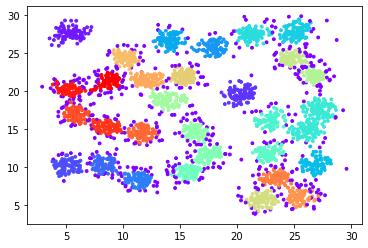

number cluster 30 time execution :  788.71 ms


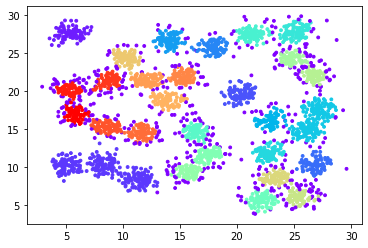

number cluster 28 time execution :  925.72 ms


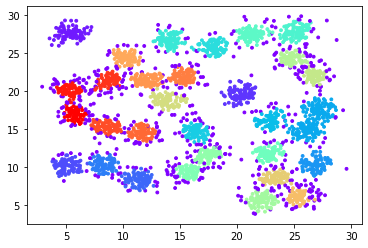

number cluster 30 time execution :  1063.69 ms


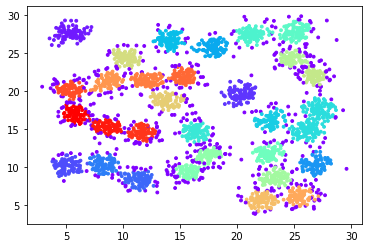

number cluster 30 time execution :  1205.32 ms


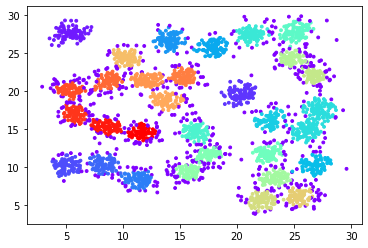

number cluster 30 time execution :  1344.56 ms


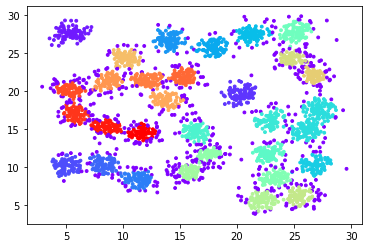

number cluster 30 time execution :  1482.6 ms


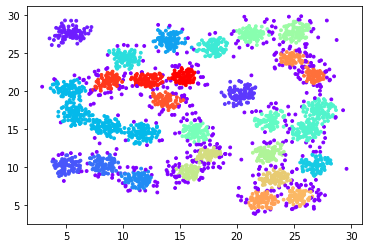

number cluster 27 time execution :  1620.98 ms


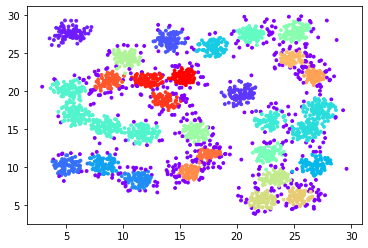

number cluster 27 time execution :  1758.31 ms


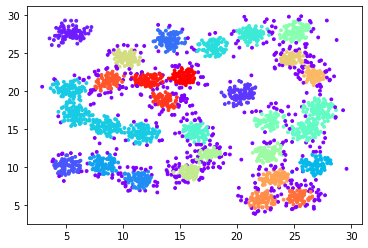

number cluster 27 time execution :  1896.79 ms


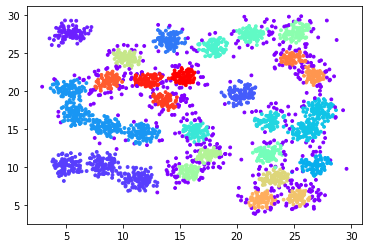

number cluster 25 time execution :  2068.77 ms


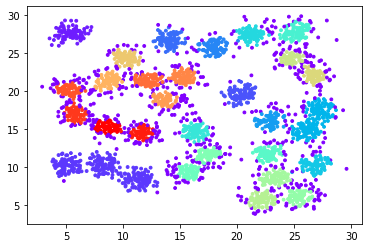

number cluster 28 time execution :  2206.46 ms


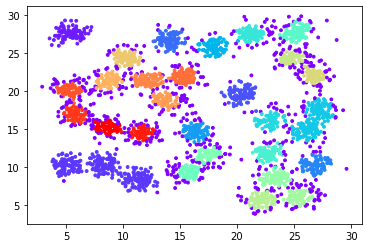

number cluster 28 time execution :  2349.25 ms


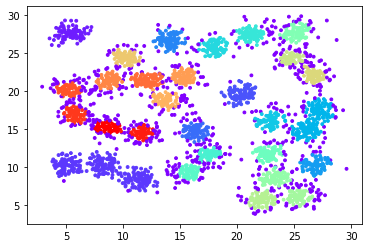

number cluster 28 time execution :  2492.26 ms


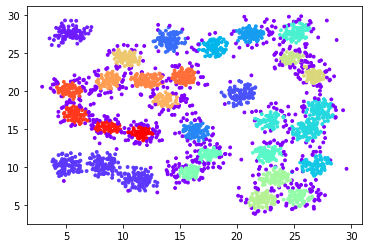

number cluster 28 time execution :  2632.69 ms


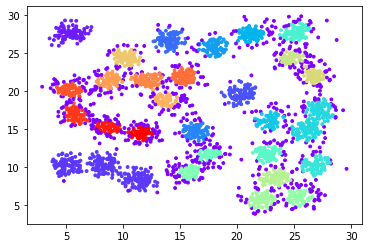

number cluster 28 time execution :  2780.03 ms


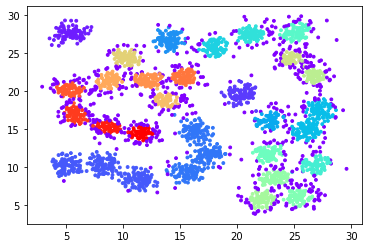

number cluster 26 time execution :  2926.89 ms


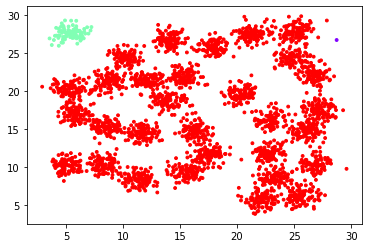

number cluster 2 time execution :  3074.43 ms


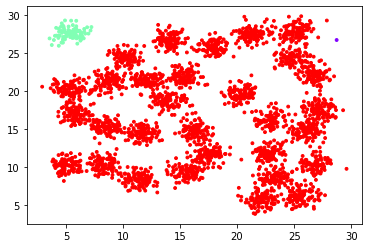

number cluster 2 time execution :  3215.62 ms


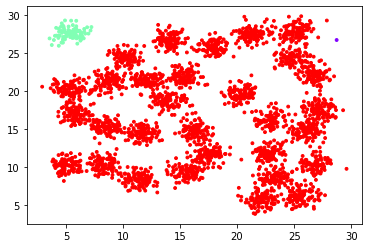

number cluster 2 time execution :  3358.98 ms


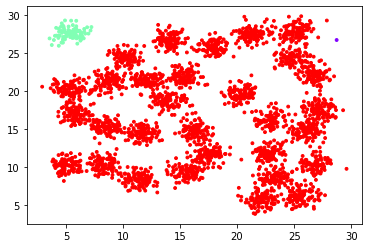

number cluster 2 time execution :  3497.54 ms


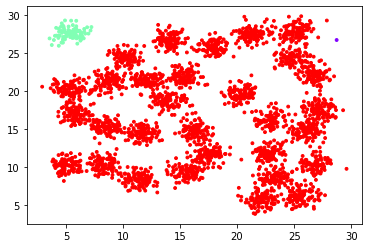

number cluster 2 time execution :  3643.55 ms


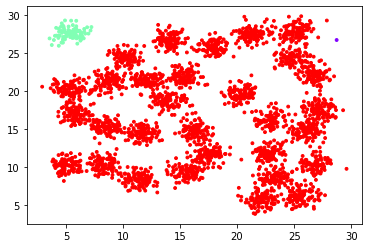

number cluster 2 time execution :  3783.21 ms


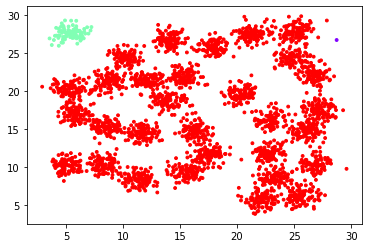

number cluster 2 time execution :  3966.55 ms


In [57]:
clusterHDBSCAN("D31.arff",30)

## 6 Synthèse

# Test

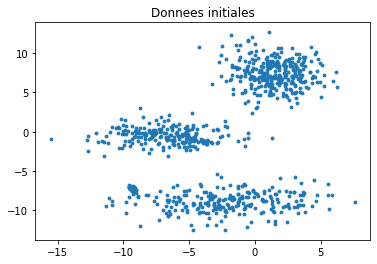

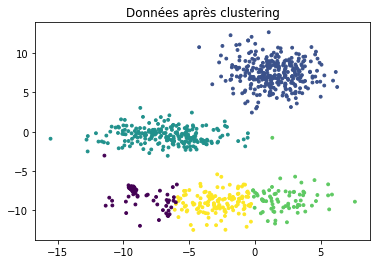

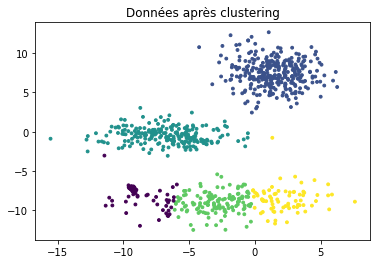

nb clusters = 5 , nb iter = 6 , runtime =  22.27 ms
Coefficient de silhouette :  0.624660192252783
Indice de Davies Bouldin :  0.5538780099168408


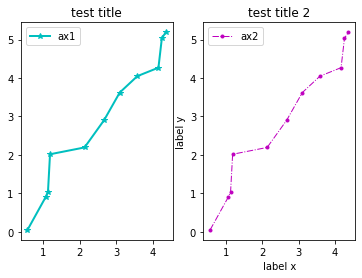

In [33]:
# Parser un fichier de données au format arff
# Data est un tableau d'exemple avec pour chacun les valeurs des features
# Ex : [[-0.499261, -0.0612356], 
#       [-1.51369, 0.265446], 
#       [-1.60321, 0.362039], .....
#      ]
# Note : le jeu de données contient un num du cluster pour chaque point
# --> IGNORER CETTE INFORMATION ....
path = './artificial/'
databrut = arff.loadarff(open(path+"2d-4c-no9.arff", 'r'))
data = [[x[0],x[1]] for x in databrut[0]]
#print(databrut)
#print(data)

# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [-0.499261, -1.51369, -1.60321, ...]
# Ex pour f1 = [-0.0612356, 0.265446, 0.362039, ...]
f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

# #################################################
# Appel d'une méthode de clustering
cl_pred = cluster.KMeans(n_clusters=5, init='k-means++').fit_predict(data)
#print(cl_pred)

# Affichage en 2D avec une couleur pour chaque cluster
plt.scatter(f0, f1, c=cl_pred,s=8)
plt.title("Données après clustering")
plt.show()

# #################################################
# Variantes pour appel d'une méthode de clustering
k=5
tps1 = time.time()
model = cluster.KMeans(n_clusters=k, init='k-means++')
model.fit(data)
tps2 = time.time()
labels = model.labels_
# Nb iteration méthode
iteration = model.n_iter_

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering")
plt.show()
print("nb clusters =",k,", nb iter =",iteration, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
#print("labels", labels)

# Metriques
silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
dbsc = metrics.davies_bouldin_score(data, model.labels_)
print("Coefficient de silhouette : ", silh)
print("Indice de Davies Bouldin : ", dbsc)

#to arrange the images
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
x = np.random.rand(11).cumsum()
y = np.random.rand(11).cumsum()
ax1.plot(x, y, 'c*-', label='ax1', linewidth=2)
ax2.plot(x, y, 'm.-.', label='ax2', linewidth=1)

ax1.legend()
ax1.set_title('test title')
ax2.legend()
ax2.set_title('test title 2')
ax2.set_xlabel('label x')
ax2.set_ylabel('label y')

plt.show()